# Ayudantía 04 - Reducción de Dimensionalidad

En esta ayudantía aprenderemos sobre distintas maneras de reducir dimensionalidad como lo son PCA y T-SNE.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
import copy
from sklearn.decomposition import PCA

Llamamos a los datasets necesarios y los convertimos en dataframes

In [2]:
data = pd.read_csv("winequality-red.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Ahora haremos binning y ordinal encoder para crear la variable que utilizaremos para clasificar 

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data['quality'] = pd.cut(data['quality'], bins=[2,5,7,9], labels=["Low", "Mid", "High"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.2 KB


In [5]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[["Low", "Mid", "High"]]) #Acá debe anotarse en orden
encoder.fit(data[['quality']])
data['quality_2'] = encoder.transform(data[['quality']])

Pasamos la variable a tipo de dato entero

In [6]:
data.info()
data['quality_2'] = data['quality_2'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
 12  quality_2             1599 non-null   float64 
dtypes: category(1), float64(12)
memory usage: 151.7 KB


Ahora escogeremos las variables según su correlación con la variable quality_2

In [7]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_2
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.094288
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.320968
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.165994
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.001474
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.113781
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.064615
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231076
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.170227
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.009287
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.223183


Escogemos "citric acid","volatile acidity","total sulfur dioxide","sulphates","alcohol" pero pueden ser otras también

### Entrenar modelo completo
Dividimos en dos partes el dataset: entrenamiento y prueba


In [8]:
from sklearn.model_selection import train_test_split

X = data[["citric acid","volatile acidity","total sulfur dioxide","sulphates","alcohol"]]
y = data['quality_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Entrenamos con SGDClassifier


In [9]:
from sklearn.linear_model import SGDClassifier

# Modelo que vamos a entrenar
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
print(sgd_clf.classes_)

#Predecimos
y_pred = sgd_clf.predict(X_test)
y_pred


[0 1 2]


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,

Evaluamos mediante métricas

In [10]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.60625
              precision    recall  f1-score   support

           0       0.56      0.89      0.69       228
           1       0.75      0.36      0.48       245
           2       0.00      0.00      0.00         7

    accuracy                           0.61       480
   macro avg       0.44      0.42      0.39       480
weighted avg       0.65      0.61      0.57       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Reduciremos dimensionalidad con PCA a 4 dimensiones

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Primero estandarizamos
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
X_std

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3)

pca4 = PCA(n_components=4)
X_train_4D = pca4.fit_transform(X_train)
X_test_4D = pca4.transform(X_test)


X_train_4D_df=pd.DataFrame(X_train_4D, columns=["dimension 1", "dimension 2","dimension 3","dimension 4"])
X_test_4D_df=pd.DataFrame(X_test_4D, columns=["dimension 1", "dimension 2","dimension 3","dimension 4"])


Ahora entrenamos el modelo

In [12]:
# Modelo que vamos a entrenar
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_4D_df, y_train)

#Predecimos
y_pred_4D = sgd_clf.predict(X_test_4D_df)
y_pred_4D

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,

Medimos según sus métricas

In [13]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print(accuracy_score(y_test, y_pred_4D))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_4D))

0.6708333333333333
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       220
           1       0.73      0.61      0.67       258
           2       0.00      0.00      0.00         2

    accuracy                           0.67       480
   macro avg       0.45      0.45      0.45       480
weighted avg       0.68      0.67      0.67       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


También podemos ver la varianza de cada componente de la reducción

In [14]:
print(pca4.explained_variance_ratio_)
sum(pca4.explained_variance_ratio_)

[0.37427853 0.2339058  0.15766547 0.14914718]


0.9149969789468744

### Reduciremos dimensionalidad con PCA ahora a 2 dimensiones

In [15]:
pca2 = PCA(n_components=2)
X_train_2D = pca2.fit_transform(X_train)
X_test_2D = pca2.transform(X_test)


X_train_2D_df=pd.DataFrame(X_train_2D, columns=["dimension 1","dimension 2"])
X_test_2D_df=pd.DataFrame(X_test_2D, columns=["dimension 1","dimension 2"])

Entrenamos el modelo

In [16]:
# Modelo que vamos a entrenar
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_2D_df, y_train)

#Predecimos
y_pred_2D = sgd_clf.predict(X_test_2D_df)
y_pred_2D

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,

Ahora calculamos las métricas con una dimensión

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print(accuracy_score(y_test, y_pred_2D))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_2D))

0.6458333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.73      0.66       220
           1       0.71      0.58      0.64       258
           2       0.00      0.00      0.00         2

    accuracy                           0.65       480
   macro avg       0.43      0.44      0.43       480
weighted avg       0.65      0.65      0.64       480



La varianza de las componentes

In [18]:
print(pca2.explained_variance_ratio_)
sum(pca2.explained_variance_ratio_)

[0.37427853 0.2339058 ]


0.608184326737123

Se puede ver que se pierde información, comparado con la varianza de 4 componentes que es 0,91

## Componentes según varianza
Podemos escoger la cantidad de componentes según la varianza que deseemos conservar, por ejemplo 0,98

In [19]:
pca = PCA(n_components=0.98)
X_PCA = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.36806816, 0.236839  , 0.15829322, 0.15061152, 0.08618811])

Podemos ver que la cantidad de componentes serían 5 para retener un 98% de la varianza

Trabajando con el dataset MNIST

In [20]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
X_m, y_m = mnist['data'], mnist['target']
y_m = y_m.astype(np.uint8)

# Tomamos los primeros 2000 elementos para que tome menos tiempo.
X_m, y_m = X_m[60000:], y_m[60000:]


# Queremos reducir a las dimensiones suficientes para preservar un 95% de la varianza al menos
pcam = PCA(n_components=0.95)


In [22]:
std_scaler = StandardScaler()
X_stdM = std_scaler.fit_transform(X_m)
X_stdM

X_PCA = pcam.fit_transform(X_stdM)
exp=pcam.explained_variance_ratio_
print(len(exp))

280


In [23]:
#Para calcular varianza acumulada

print(sum(exp))

#Para sumar solo algunos valores de la lista

print(exp[0:10])
print(sum(exp[0:10]))

0.9500609170265785
[0.06196825 0.04243746 0.04044453 0.0323059  0.02755073 0.02409125
 0.02045291 0.01883155 0.01670851 0.01517525]
0.29996632807493945


## Reducción de dimensionalidad con T-SNE 


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


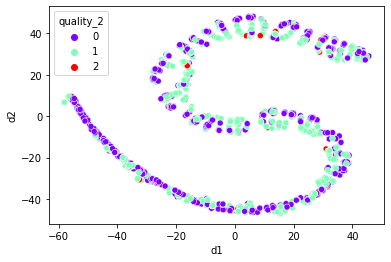

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_2D = tsne.fit_transform(X)
X_2D = pd.DataFrame(X_2D, columns=["d1", "d2"])
y_df = pd.DataFrame(y, columns=["quality_2"])

df_2D = X_2D.join(y_df)


sns.scatterplot(data=df_2D, x="d1", y="d2", hue="quality_2", palette="rainbow")
